In [1]:
import numpy
from matplotlib import pyplot

In [2]:
def autocorr(x):
    xx = x - x.mean()
    result = numpy.correlate(xx, xx, mode='full')
    return result[result.size//2:]

def autocorr_probs(ps, indices=None):
    if indices is None:
        indices = numpy.arange(ps.shape[1])
    zeros = numpy.array([
        autocorr(ps[:,i,0]) for i in indices
    ])
    ones = numpy.array([
        autocorr(ps[:,i,1]) for i in indices
    ])
    return zeros, ones

In [3]:
arr = numpy.load("autocorr_data/autocorr_L16.npz")
probs = arr["all_transition_probs"]
probs.shape

(8192, 257, 2)

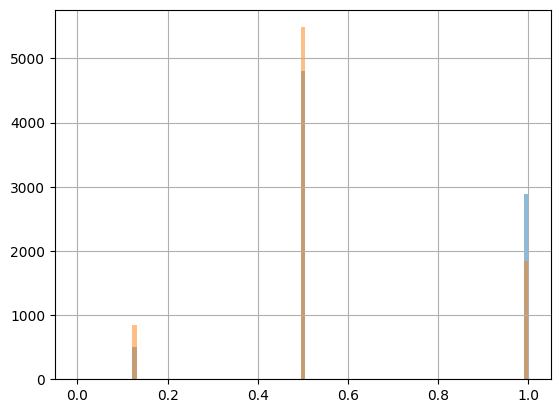

In [4]:
pyplot.hist(probs[:,64,0], bins=numpy.linspace(0,1,100), alpha=0.5)
pyplot.hist(probs[:,64,1], bins=numpy.linspace(0,1,100), alpha=0.5)
pyplot.grid()
pyplot.show()

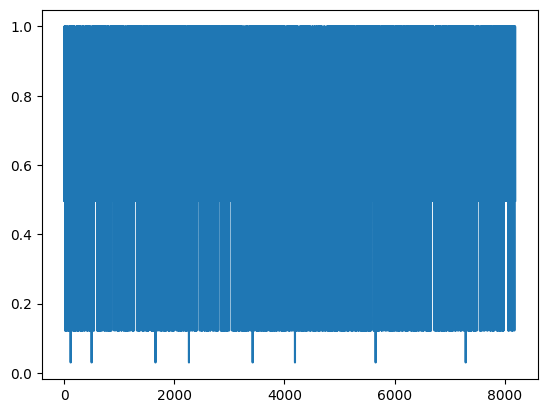

In [5]:
pyplot.plot(probs[:,64,1])

In [6]:
zeros, ones = autocorr_probs(probs, [i*i for i in range(16+1)])

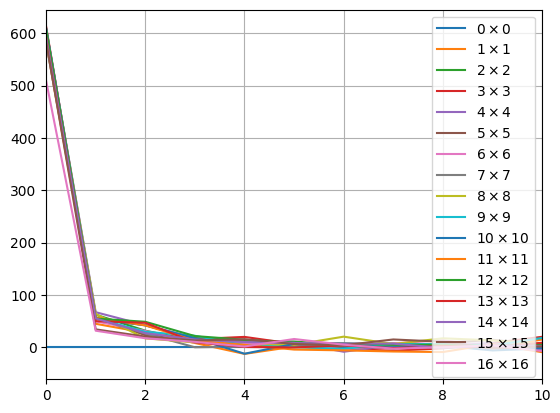

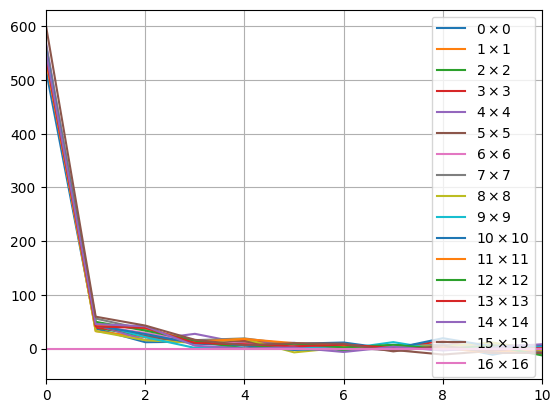

In [7]:
for l, z in enumerate(zeros):
    pyplot.plot(z, label=fr"${l}\times{l}$")
pyplot.grid()
pyplot.legend()
pyplot.xlim((0,10))
pyplot.show()

for l, z in enumerate(ones):
    pyplot.plot(z, label=fr"${l}\times{l}$")
pyplot.grid()
pyplot.legend()
pyplot.xlim((0,10))
pyplot.show()